In [90]:
import os
from google.cloud import bigquery
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

In [91]:
PROJECT_ID = "<YOUR PROJECT ID>"
DATASET_NAME = '<YOUR DATASET_NAME>'
TABLE_NAME = "<YOUR TABLE_NAME>"

table_id = "{project_id}.{dataset_name}.{table_name}".format(project_id=PROJECT_ID, dataset_name=DATASET_NAME, 
            table_name=TABLE_NAME)
table_id

'integrated-bit-312717.customs.customs_test3'

In [92]:
client = bigquery.Client(project=PROJECT_ID, location="US")

In [50]:
query_job = client.query(
    """
        SELECT hs_code, value, type FROM `{table_id}` WHERE (`country`="THAILAND" AND `value`!=0)
    """.format(table_id=table_id)
)
result = query_job.result()
print(result)
data_thai = [
    {
        'hs_code':row.hs_code,
        'value':row.value,
        'type':row.type
    } for row in result ]

In [125]:
df_thai = pd.DataFrame(data_thai)
df_thai

,hs_code,value,type
0,4010,19127,import
1,4012,29006335,import
2,3917,924756,import
3,4202,495354,import
4,2208,4703,import
...,...,...,...
81964,8535,438683,import
81965,8538,3135078,import
81966,9030,5457768,import
81967,8803,837378,import


In [126]:
df_thai_group = df_x.groupby(['hs_code','type']).agg('sum').sort_values(by='value',ascending=False).reset_index()
df_thai_group

,hs_code,type,value
0,8542,import,217811188486
1,7113,import,156303965446
2,8471,import,127543430314
3,7326,import,106777490265
4,8517,import,99305156853
...,...,...,...
1015,8002,import,71
1016,5302,import,40
1017,5908,import,36
1018,7107,import,15


In [127]:
df_hs_code = pd.read_csv('hs_code_split.csv', dtype={'hs_code':object})
df_hs_code['short_name']=df_hs_code['name'].apply(lambda x: x.split(',')[0])
df_hs_code

,hs_code,name,short_name
0,0101,Live animals,Live animals
1,0102,Live animals,Live animals
2,0103,Live animals,Live animals
3,0104,Live animals,Live animals
4,0105,Live animals,Live animals
...,...,...,...
1249,9702,"Works of art, collectors’ pieces, and antiques",Works of art
1250,9703,"Works of art, collectors’ pieces, and antiques",Works of art
1251,9704,"Works of art, collectors’ pieces, and antiques",Works of art
1252,9705,"Works of art, collectors’ pieces, and antiques",Works of art


In [128]:
df_thai_group=df_thai_group.merge(df_hs_code, left_on='hs_code', right_on='hs_code').sort_values(by='value', ascending=False)
df_thai_group

,hs_code,type,value,name,short_name
0,8542,import,217811188486,Electrical machinery and equipment and parts t...,Electrical machinery and equipment and parts t...
2,7113,import,156303965446,"Natural or cultured pearls, precious or semi-p...",Natural or cultured pearls
3,8471,import,127543430314,"Nuclear reactors, boilers, machinery and mecha...",Nuclear reactors
4,7326,import,106777490265,Articles of iron or steel,Articles of iron or steel
5,8517,import,99305156853,Electrical machinery and equipment and parts t...,Electrical machinery and equipment and parts t...
...,...,...,...,...,...
1015,8002,import,71,Tin and articles thereof,Tin and articles thereof
1016,5302,import,40,Other vegetable textile fibres; paper yarn and...,Other vegetable textile fibres; paper yarn and...
1017,5908,import,36,"Impregnated, coated, covered or laminated text...",Impregnated
1018,7107,import,15,"Natural or cultured pearls, precious or semi-p...",Natural or cultured pearls


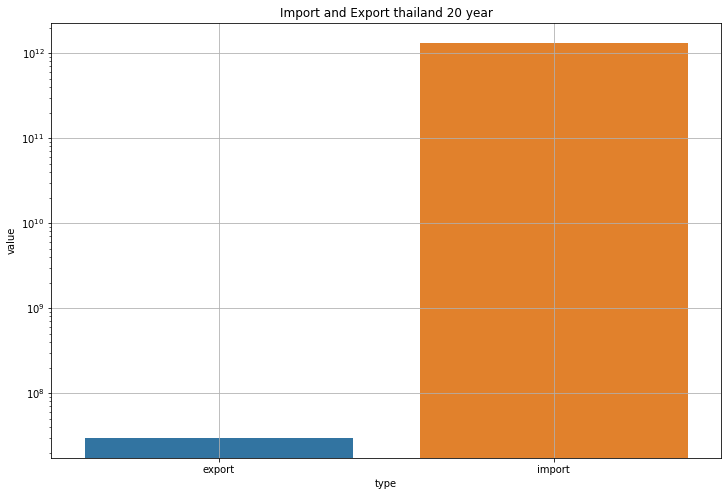

In [135]:
plt.figure(figsize=(12,8))
plt.title('Import and Export thailand 20 year')
fig = sns.barplot(x='type', y='value', data=df_thai_group.groupby('type').agg('sum').reset_index())
fig.set_yscale("log")
plt.grid()
fig.figure.savefig('fig/Import_Export_thailand.png')

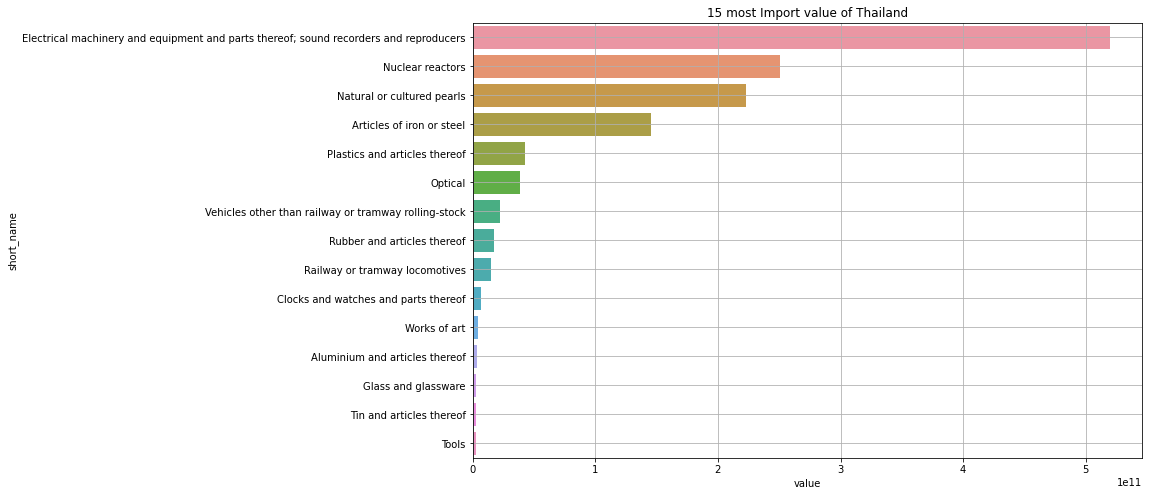

In [134]:
plt.figure(figsize=(12,8))
plt.title('15 most Import value of Thailand')
fig = sns.barplot(y='short_name', x='value', 
                data=df_thai_group[df_thai_group['type']=='import']\
                        .groupby('short_name')\
                        .agg('sum')\
                        .reset_index().sort_values(by='value', ascending=False)[:15])
plt.grid()

fig.figure.savefig('fig/15_mostImportThailand.png', bbox_inches = 'tight')

In [139]:
df_thai_group[df_thai_group['type']=='export']\
                        .groupby('short_name')\
                        .agg('sum')\
                        .reset_index().sort_values(by='value', ascending=False)[:15]

,short_name,value
5,Nuclear reactors,13680000
8,Rubber and articles thereof,7050550
3,Electrical machinery and equipment and parts t...,3874452
2,Copper and articles thereof,1547925
0,Aluminium and articles thereof,1168151
7,Plastics and articles thereof,1151579
1,Articles of apparel and clothing accessories,1102598
6,Paper and paperboard; articles of paper pulp,82955
9,Wood and articles of wood; wood charcoal,16284
4,Miscellaneous chemical products,4793


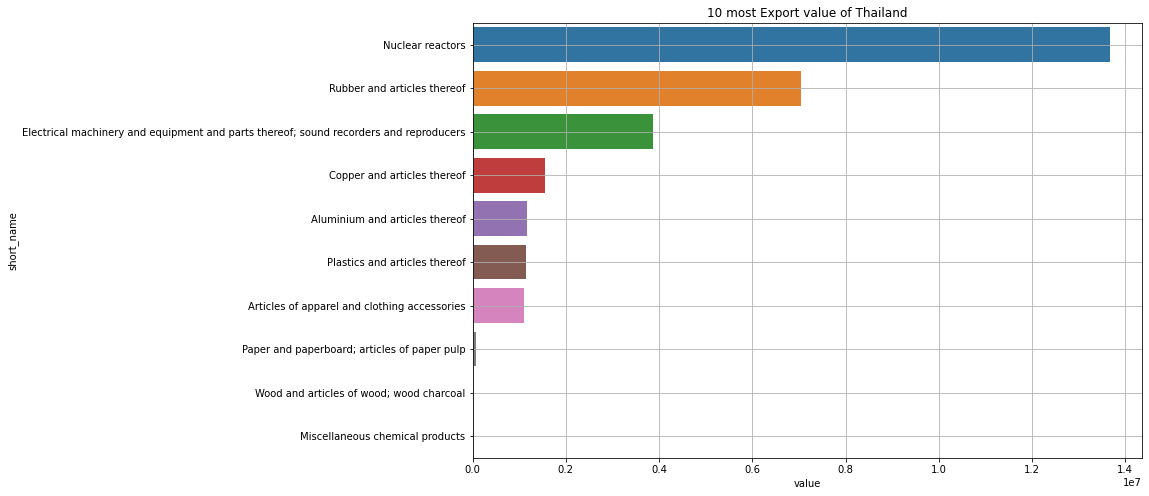

In [141]:
plt.figure(figsize=(12,8))
plt.title('10 most Export value of Thailand')
fig = sns.barplot(y='short_name', x='value', 
                data=df_thai_group[df_thai_group['type']=='export']\
                        .groupby('short_name')\
                        .agg('sum')\
                        .reset_index().sort_values(by='value', ascending=False)[:10])
plt.grid()
fig.figure.savefig('fig/10_mostExportThailand.png', bbox_inches = 'tight')

In [99]:
df_thai_group[df_thai_group['type']=='import'][:10]

,hs_code,type,value,name
0,8542,import,217811188486,Electrical machinery and equipment and parts t...
2,7113,import,156303965446,"Natural or cultured pearls, precious or semi-p..."
3,8471,import,127543430314,"Nuclear reactors, boilers, machinery and mecha..."
4,7326,import,106777490265,Articles of iron or steel
5,8517,import,99305156853,Electrical machinery and equipment and parts t...
6,8473,import,86390619113,"Nuclear reactors, boilers, machinery and mecha..."
7,8543,import,56577005996,Electrical machinery and equipment and parts t...
8,7103,import,44717318243,"Natural or cultured pearls, precious or semi-p..."
9,8525,import,23991617297,Electrical machinery and equipment and parts t...
10,8537,import,22964966070,Electrical machinery and equipment and parts t...


In [146]:
query_job = client.query(
    """
        SELECT hs_code, value, type, year_month FROM `{table_id}` 
        WHERE (`country`="THAILAND" AND `value`!=0 AND `hs_code`="8542" AND `type`="import")
    """.format(table_id=table_id)
)
result = query_job.result()
print(result)
data = [
    {
        'hs_code':row.hs_code,
        'value':row.value,
        'type':row.type,
        'year_month':row.year_month
    } for row in result ]

In [147]:
df = pd.DataFrame(data)
df = df.sort_values(by='year_month')
df

,hs_code,value,type,year_month
34,8542,251480322,import,2001-01
22,8542,178914246,import,2001-02
25,8542,163095022,import,2001-03
2,8542,349826165,import,2001-04
15,8542,322581073,import,2001-05
...,...,...,...,...
165,8542,2123325954,import,2020-10
232,8542,1582686767,import,2020-11
201,8542,1718695994,import,2020-12
19,8542,2077444177,import,2021-01


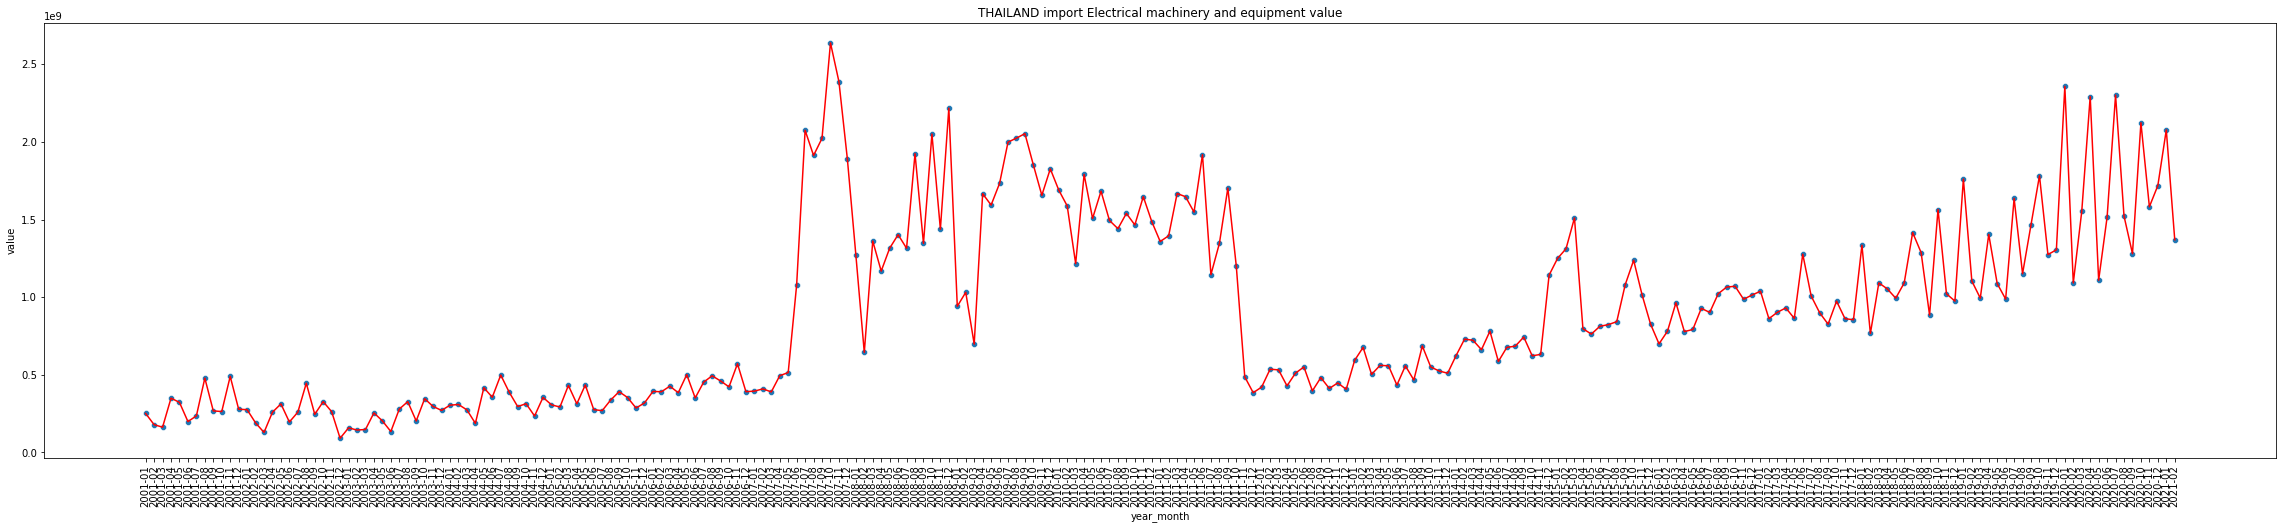

In [149]:
plt.figure(figsize=(40,8))
plt.title("THAILAND import Electrical machinery and equipment value")
sns.scatterplot(x='year_month', y='value',data=df)
fig = sns.lineplot(x='year_month', y='value',data=df, color='r')
plt.xticks(rotation=90)
fig.figure.savefig('fig/THAILAND_import_Electrical_value.png', bbox_inches = 'tight')
plt.show()